# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Exercise 11.1

In the first exercise we inspect the relations between a linear regression and the number number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$.

In [15]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

We consider the function $ f(x) = 2x +1 $ 

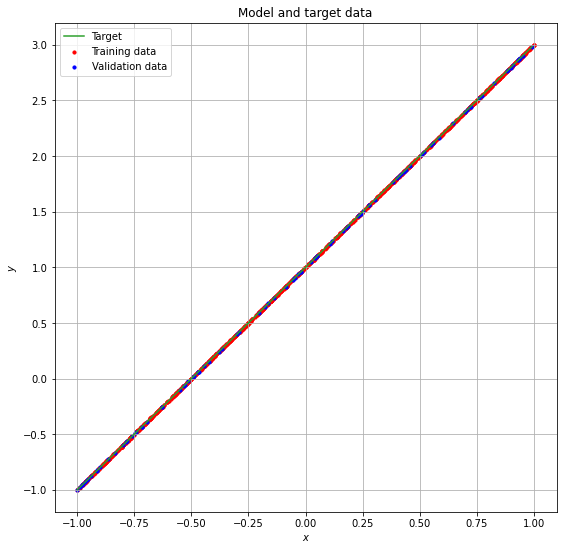

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects


ntrain=1000
nvalid=100

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, ntrain)
x_valid = np.random.uniform(-1, 1, nvalid)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.0 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

# plot training and target dataset
plt.figure(figsize=(9,9))
plt.plot(x_valid, y_target, color = "C2", label="Target")
plt.title("Model and target data")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.scatter(x_train, y_train, color='red', s=10, label="Training data")
plt.scatter(x_valid, y_valid, color='blue', s=10, label="Validation data")
plt.grid(True); 
plt.legend()
plt.show()

In this first plot we don't consider the noise $\sigma  = 0$.

In the above plot we show the training data, the validation data and the target. Clearly, since $\sigma = 0$, all the values are superimposed.

At this point we build the NN model. We do not need to many neurons, as long as we optimize the input value and the bias.

In [17]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
# get a summary of our composed model
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Now we do the model training. We use a batch size of $32$, i.e. we are considering the "mini-batch SGD".

In [18]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=65,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/65
32/32 [==============================] - 1s 6ms/step - loss: 1.9668 - mse: 1.9668 - val_loss: 1.4752 - val_mse: 1.4752
Epoch 2/65
32/32 [==============================] - 0s 2ms/step - loss: 1.0633 - mse: 1.0633 - val_loss: 0.8740 - val_mse: 0.8740
Epoch 3/65
32/32 [==============================] - 0s 2ms/step - loss: 0.6341 - mse: 0.6341 - val_loss: 0.5476 - val_mse: 0.5476
Epoch 4/65
32/32 [==============================] - 0s 2ms/step - loss: 0.3971 - mse: 0.3971 - val_loss: 0.3479 - val_mse: 0.3479
Epoch 5/65
32/32 [==============================] - 0s 2ms/step - loss: 0.2515 - mse: 0.2515 - val_loss: 0.2234 - val_mse: 0.2234
Epoch 6/65
32/32 [==============================] - 0s 2ms/step - loss: 0.1612 - mse: 0.1612 - val_loss: 0.1445 - val_mse: 0.1445
Epoch 7/65
32/32 [==============================] - 0s 2ms/step - loss: 0.1042 - mse: 0.1042 - val_loss: 0.0938 - val_mse: 0.0938
Epoch 8/65
32/32 [==============================] - 0s 2ms/step - loss: 0.0675 - mse: 0.06

In [19]:
# return weights and biases
model.get_weights()

[array([[1.9999934]], dtype=float32), array([1.0000001], dtype=float32)]

As we can see, the values obtained are the target value. 

Since we consider $\sigma = 0$, the evaluation of the model will not show differences between the model and the validation data.

In [20]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 2ms/step - loss: 1.6786e-11 - mse: 1.6786e-11

Test loss: 1.6786167941762464e-11
Test accuracy: 1.6786167941762464e-11


In [21]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 2ms/step - loss: 1.6786e-11 - mse: 1.6786e-11

Test loss: 1.6786167941762464e-11
Test accuracy: 1.6786167941762464e-11


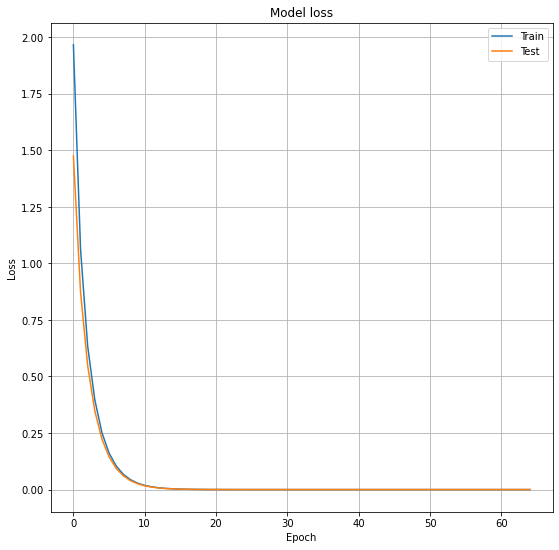

In [22]:
# look into training history
# Plot training & validation loss values

plt.figure(figsize=(9,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

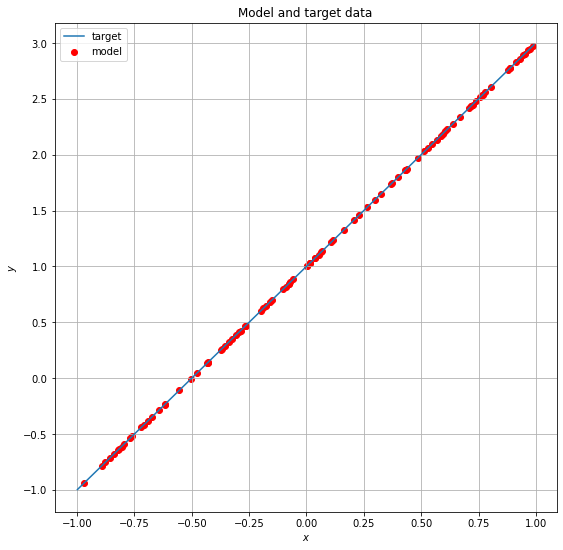

In [25]:
plt.figure(figsize=(9,9))
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label = 'model')
plt.plot(x_valid, y_target, label = 'target')
plt.title("Model and target data")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid(True)
plt.legend()
plt.show()

In the above plots we show the Loss of the training and test values and the distribution of the model values with respect to the target. As we can see, the model fits data: indeed, after 15 epochs the loss is zero for both, training and validation data. From the second plot we can observe that the target is approximed with accuracy.

At this point a possible question is what can happen by varying the number of data. But thinking about the functioning of what has just been shown and starting from the assumption that we are considering the case with $\sigma=0$, it is clear that all the data will be exact and regardless of their quantity it will be possible to reach the target after a precise number of epochs. 

For this reason, let us now analyze the case with a non-zero noise.

We analyze the case with $\sigma = 0.4$. The number of training and validation data remain unchanged: $1000$ for training and $100$ for validation.

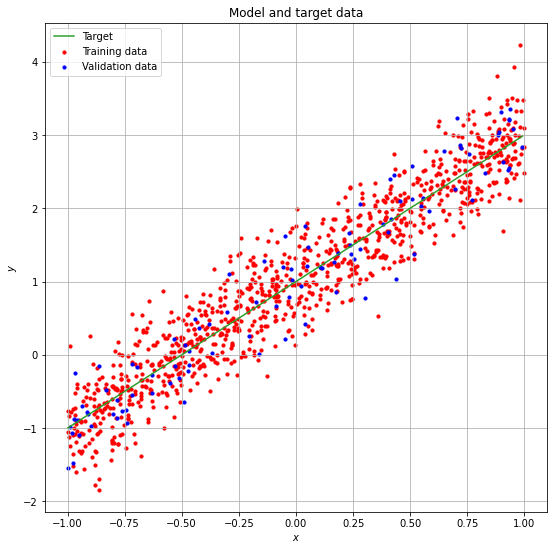

In [24]:
ntrain=1000
nvalid=100

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, ntrain)
x_valid = np.random.uniform(-1, 1, nvalid)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.4 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)


# plot training and target dataset
plt.figure(figsize=(9,9))
plt.plot(x_valid, y_target, color = "C2", label="Target")
plt.title("Model and target data")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.scatter(x_train, y_train, color='red', s=10, label="Training data")
plt.scatter(x_valid, y_valid, color='blue', s=10, label="Validation data")
plt.grid(True); 
plt.legend()
plt.show()

In [26]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
# get a summary of our composed model
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [27]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/100
32/32 [==============================] - 1s 5ms/step - loss: 1.8471 - mse: 1.8471 - val_loss: 1.4926 - val_mse: 1.4926
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.0470 - mse: 1.0470 - val_loss: 0.9432 - val_mse: 0.9432
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6760 - mse: 0.6760 - val_loss: 0.6454 - val_mse: 0.6454
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.4739 - mse: 0.4739 - val_loss: 0.4722 - val_mse: 0.4722
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.3577 - mse: 0.3577 - val_loss: 0.3599 - val_mse: 0.3599
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2841 - mse: 0.2841 - val_loss: 0.2869 - val_mse: 0.2869
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2377 - mse: 0.2377 - val_loss: 0.2374 - val_mse: 0.2374
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2071 - m

In [28]:
# return weights and biases
print(model.get_weights())

[array([[2.0034063]], dtype=float32), array([1.0073055], dtype=float32)]


In [31]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 2ms/step - loss: 0.1313 - mse: 0.1313

Test loss: 0.13130734860897064
Test accuracy: 0.13130734860897064


In [32]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 2ms/step - loss: 5.5927e-05 - mse: 5.5927e-05

Test loss: 5.59274667466525e-05
Test accuracy: 5.59274667466525e-05


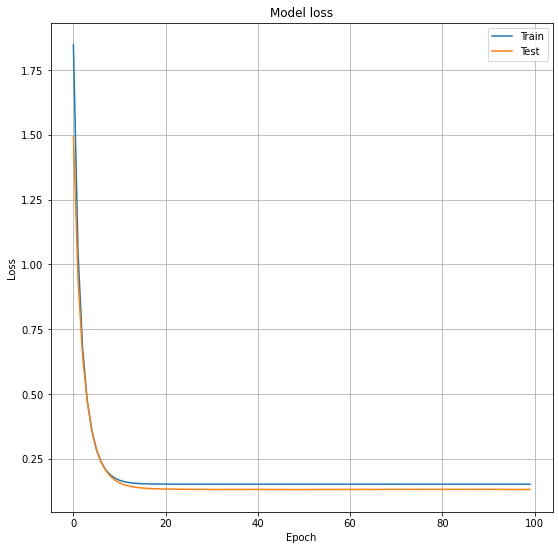

In [33]:
# look into training history
# Plot training & validation loss values
plt.figure(figsize=(9,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

We can observe that introducing a sigma, the loss can not assume null value. In any case, the weights of the model correspond to those of the straight line. 
Furthermore we can observe that the loss for the train data and the loss for the test data have a discrepancy. This is due to the presence of noise.

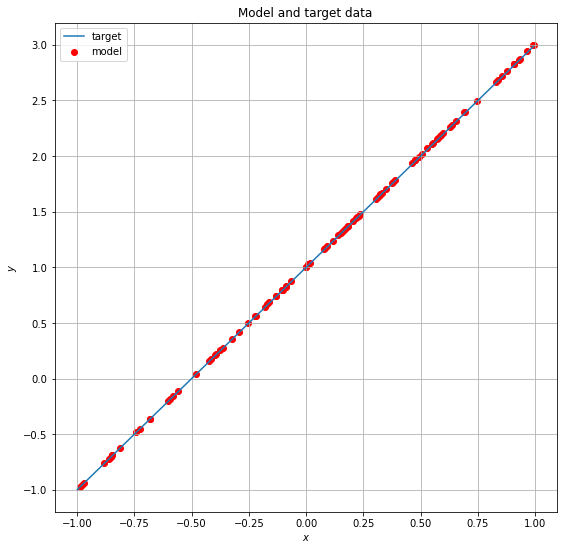

In [34]:
plt.figure(figsize=(9,9))
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label = 'model')
plt.plot(x_valid, y_target, label = 'target')
plt.title("Model and target data")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid(True)
plt.legend()
plt.show()

Also in this case we can observe that the target is fitted with accuracy.

At this point we can ask ourselves the same question as before, which is what changes if we modify the number of data.

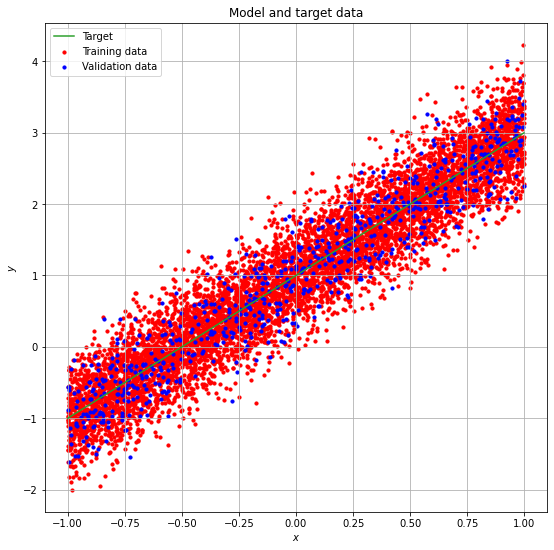

In [35]:
ntrain=7000
nvalid=700

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, ntrain)
x_valid = np.random.uniform(-1, 1, nvalid)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.4 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)


# plot training and target dataset
plt.figure(figsize=(9,9))
plt.plot(x_valid, y_target, color = "C2", label="Target")
plt.title("Model and target data")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.scatter(x_train, y_train, color='red', s=10, label="Training data")
plt.scatter(x_valid, y_valid, color='blue', s=10, label="Validation data")
plt.grid(True); 
plt.legend()
plt.show()

In [36]:
model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
# get a summary of our composed model
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [37]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 0.5360 - mse: 0.5360 - val_loss: 0.1934 - val_mse: 0.1934
Epoch 2/100
219/219 [==============================] - 0s 938us/step - loss: 0.1746 - mse: 0.1746 - val_loss: 0.1495 - val_mse: 0.1495
Epoch 3/100
219/219 [==============================] - 0s 1ms/step - loss: 0.1610 - mse: 0.1610 - val_loss: 0.1468 - val_mse: 0.1468
Epoch 4/100
219/219 [==============================] - 0s 983us/step - loss: 0.1603 - mse: 0.1603 - val_loss: 0.1467 - val_mse: 0.1467
Epoch 5/100
219/219 [==============================] - 0s 907us/step - loss: 0.1603 - mse: 0.1603 - val_loss: 0.1467 - val_mse: 0.1467
Epoch 6/100
219/219 [==============================] - 0s 990us/step - loss: 0.1603 - mse: 0.1603 - val_loss: 0.1466 - val_mse: 0.1466
Epoch 7/100
219/219 [==============================] - 0s 851us/step - loss: 0.1603 - mse: 0.1603 - val_loss: 0.1466 - val_mse: 0.1466
Epoch 8/100
219/219 [==============================] - 0s 9

Epoch 62/100
219/219 [==============================] - 0s 891us/step - loss: 0.1600 - mse: 0.1600 - val_loss: 0.1468 - val_mse: 0.1468
Epoch 63/100
219/219 [==============================] - 0s 866us/step - loss: 0.1603 - mse: 0.1603 - val_loss: 0.1466 - val_mse: 0.1466
Epoch 64/100
219/219 [==============================] - 0s 803us/step - loss: 0.1602 - mse: 0.1602 - val_loss: 0.1466 - val_mse: 0.1466
Epoch 65/100
219/219 [==============================] - 0s 1ms/step - loss: 0.1602 - mse: 0.1602 - val_loss: 0.1466 - val_mse: 0.1466
Epoch 66/100
219/219 [==============================] - 0s 975us/step - loss: 0.1603 - mse: 0.1603 - val_loss: 0.1468 - val_mse: 0.1468
Epoch 67/100
219/219 [==============================] - 0s 895us/step - loss: 0.1602 - mse: 0.1602 - val_loss: 0.1466 - val_mse: 0.1466
Epoch 68/100
219/219 [==============================] - 0s 845us/step - loss: 0.1602 - mse: 0.1602 - val_loss: 0.1468 - val_mse: 0.1468
Epoch 69/100
219/219 [============================

In [38]:
# return weights and biases
print(model.get_weights())

[array([[2.0081806]], dtype=float32), array([0.9777539], dtype=float32)]


In [39]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

22/22 [==============================] - 0s 1ms/step - loss: 0.1467 - mse: 0.1467

Test loss: 0.14665569365024567
Test accuracy: 0.14665569365024567


In [40]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

22/22 [==============================] - 0s 883us/step - loss: 5.1767e-04 - mse: 5.1767e-04

Test loss: 0.0005176704726181924
Test accuracy: 0.0005176704726181924


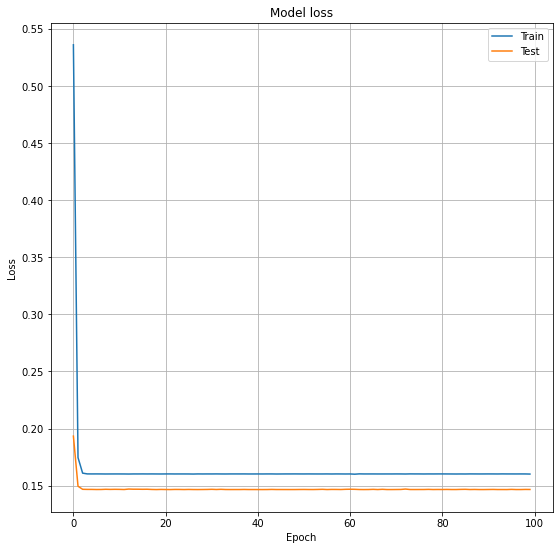

In [41]:
# look into training history
# Plot training & validation loss values
plt.figure(figsize=(9,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid(True)
plt.show()

In [43]:
print("Final training data loss: ", history.history['loss'][-1])
print("Final validation data loss: ", history.history['val_loss'][-1])

Final training data loss:  0.16015255451202393
Final validation data loss:  0.14665569365024567


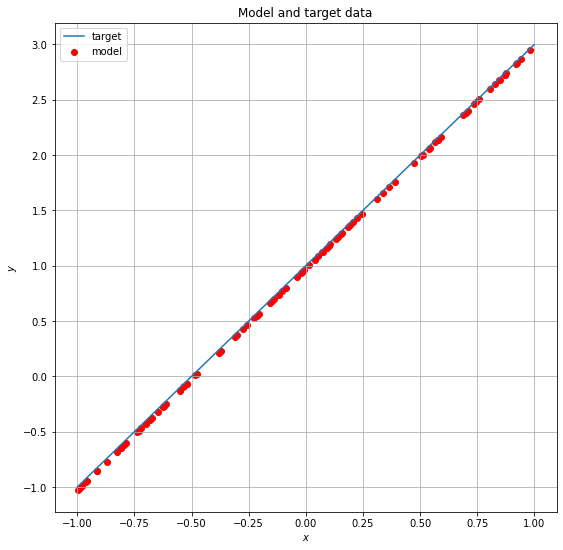

In [42]:
plt.figure(figsize=(9,9))
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r', label = 'model')
plt.plot(x_valid, y_target, label = 'target')
plt.title("Model and target data")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid(True)
plt.legend()
plt.show()

We can observe that although we have increased the number of data by a factor of 7, the losses seem to tend towards a typical value: for the training loss $ 0.16 $ and for the validation loss $ 0.14 $. Such a value is the variance $\sigma^2$.
Finally, we can observe that, as is normal, in the presence of noise and a lot of data the model is able to fit the target less effectively.